# Clone the repo
Get the repo

In [11]:
!git clone https://github.com/binkybarnes/yolov7-hand-detection.git

Cloning into 'yolov7-hand-detection'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 104 (delta 3), reused 10 (delta 2), pack-reused 89 (from 1)
Receiving objects: 100% (104/104), 67.45 MiB | 38.24 MiB/s, done.
Resolving deltas: 100% (6/6), done.


Install the necessary packages.

In [12]:
%cd yolov7-hand-detection

/content/yolov7-hand-detection


In [3]:
# !pip install -r src/requirements.txt

# Download the dataset
Run the **getCoco.sh** file to download the dataset.

In [13]:
!sudo apt-get install unzip
!sh data/getCoco.sh

Streaming output truncated to the last 5000 lines.
  inflating: data/coco/COCO-Hand/COCO-Hand-Big/COCO-Hand-Big_Images/000000439106.jpg  
  inflating: data/coco/COCO-Hand/COCO-Hand-Big/COCO-Hand-Big_Images/000000095113.jpg  
  inflating: data/coco/COCO-Hand/COCO-Hand-Big/COCO-Hand-Big_Images/000000244476.jpg  
  inflating: data/coco/COCO-Hand/COCO-Hand-Big/COCO-Hand-Big_Images/000000410446.jpg  
  inflating: data/coco/COCO-Hand/COCO-Hand-Big/COCO-Hand-Big_Images/000000203747.jpg  
  inflating: data/coco/COCO-Hand/COCO-Hand-Big/COCO-Hand-Big_Images/000000438993.jpg  
  inflating: data/coco/COCO-Hand/COCO-Hand-Big/COCO-Hand-Big_Images/000000335855.jpg  
  inflating: data/coco/COCO-Hand/COCO-Hand-Big/COCO-Hand-Big_Images/000000037519.jpg  
  inflating: data/coco/COCO-Hand/COCO-Hand-Big/COCO-Hand-Big_Images/000000434689.jpg  
  inflating: data/coco/COCO-Hand/COCO-Hand-Big/COCO-Hand-Big_Images/000000413989.jpg  
  inflating: data/coco/COCO-Hand/COCO-Hand-Big/COCO-Hand-Big_Images/00000039596

# Prepare data
We nee to convert data to YOLO format.Now that we have our dataset, we need to convert the annotations into the format expected by YOLOv7. YOLOv7 expects data to be organized in a specific way, otherwise it is unable to parse through the directories.

In [14]:
!python src/convert_annotations.py --images data/coco/COCO-Hand/COCO-Hand-S/COCO-Hand-S_Images --annotations data/coco/COCO-Hand/COCO-Hand-S/COCO-Hand-S_annotations.txt

100% 4533/4533 [00:00<00:00, 15554.79it/s]


To see if the conversion is correct, run.

In [15]:
!python src/convert_annotations.py --images data/coco/COCO-Hand/COCO-Hand-S/COCO-Hand-S_Images --annotations data/coco/COCO-Hand/COCO-Hand-S/COCO-Hand-S_annotations.txt --plot

100% 4533/4533 [00:00<00:00, 9987.90it/s] 
Figure(640x480)


Then, split data into sets.Next, we need to partition the dataset into train, validation, and test sets. These will contain 80%, 10%, and 10% of the data, respectively.

In [16]:
!python src/prepare_data.py --path data/coco/COCO-Hand/COCO-Hand-S/COCO-Hand-S_Images

# Start training

In [17]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.3/949.3 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [25]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [2]:
%cd yolov7-hand-detection

/content/yolov7-hand-detection


In [3]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")

# Train the model on your custom hand detection dataset
results = model.train(data="hand_detection.yaml", epochs=100, imgsz=640, patience=10)

Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=hand_detection.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True,

train: Scanning /content/yolov7-hand-detection/data/labels/train.cache... 3626 images, 0 backgrounds, 1 corrupt: 100%|██████████| 3626/3626 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/yolov7-hand-detection/data/images/train/000000038031.jpg: ignoring corrupt image/label: negative label values [     -0.002]
train: WARNING ⚠️ /content/yolov7-hand-detection/data/images/train/000000083134.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/yolov7-hand-detection/data/images/train/000000089154.jpg: 1 duplicate labels removed


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/yolov7-hand-detection/data/labels/val.cache... 453 images, 0 backgrounds, 0 corrupt: 100%|██████████| 453/453 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train5
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.33G      2.348      3.044      1.532         47        640: 100%|██████████| 227/227 [01:08<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.20it/s]

                   all        453       1072      0.333      0.285      0.202     0.0765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.48G      2.347      2.451      1.515         47        640: 100%|██████████| 227/227 [01:05<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.68it/s]

                   all        453       1072      0.351      0.193      0.168     0.0598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.48G      2.349      2.314       1.53         35        640: 100%|██████████| 227/227 [01:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.37it/s]


                   all        453       1072       0.34      0.254      0.195     0.0682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.49G      2.319      2.198      1.507         36        640: 100%|██████████| 227/227 [01:02<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.67it/s]

                   all        453       1072      0.409      0.257      0.254      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       2.5G      2.279      2.135      1.484         27        640: 100%|██████████| 227/227 [01:02<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.74it/s]


                   all        453       1072      0.425      0.335      0.294      0.111

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       2.5G      2.239      2.059      1.468         27        640: 100%|██████████| 227/227 [01:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.76it/s]

                   all        453       1072      0.423      0.329      0.288      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.51G      2.238      2.045      1.463         55        640: 100%|██████████| 227/227 [01:02<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.51it/s]

                   all        453       1072       0.47      0.312      0.306      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.53G      2.196      1.969      1.435         37        640: 100%|██████████| 227/227 [01:02<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.32it/s]

                   all        453       1072      0.487      0.376       0.33      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.53G       2.19      1.954      1.437         24        640: 100%|██████████| 227/227 [01:02<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.57it/s]

                   all        453       1072       0.48      0.365      0.333      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.53G      2.164       1.91      1.421         31        640: 100%|██████████| 227/227 [01:02<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.68it/s]

                   all        453       1072      0.471      0.355      0.338      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.53G      2.154      1.887      1.418         30        640: 100%|██████████| 227/227 [01:02<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.55it/s]

                   all        453       1072      0.488      0.376      0.346      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.53G      2.129      1.842      1.403         45        640: 100%|██████████| 227/227 [01:02<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.57it/s]

                   all        453       1072      0.507      0.393      0.368      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.53G       2.11      1.828       1.39         57        640: 100%|██████████| 227/227 [01:02<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.53it/s]

                   all        453       1072      0.537      0.427      0.395      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.53G      2.116      1.812      1.394         19        640: 100%|██████████| 227/227 [01:02<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.62it/s]

                   all        453       1072      0.542       0.42      0.388      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.53G      2.099      1.768      1.384         25        640: 100%|██████████| 227/227 [01:02<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.61it/s]

                   all        453       1072      0.552      0.417      0.391      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.53G      2.083      1.771      1.377         35        640: 100%|██████████| 227/227 [01:02<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.67it/s]

                   all        453       1072      0.535      0.405      0.402      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.53G      2.077      1.735      1.368         52        640: 100%|██████████| 227/227 [01:02<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.85it/s]

                   all        453       1072      0.522      0.453      0.407      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.53G      2.065      1.731      1.373         39        640: 100%|██████████| 227/227 [01:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.67it/s]

                   all        453       1072      0.579      0.419      0.424      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.53G      2.056      1.724      1.362         36        640: 100%|██████████| 227/227 [01:02<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.49it/s]

                   all        453       1072      0.551      0.439      0.417      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.53G      2.028      1.692      1.344         34        640: 100%|██████████| 227/227 [01:02<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.94it/s]

                   all        453       1072      0.529      0.426      0.415      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.53G      2.044      1.675      1.347         22        640: 100%|██████████| 227/227 [01:02<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.59it/s]

                   all        453       1072      0.565      0.458      0.434      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.53G      2.033      1.673      1.341         25        640: 100%|██████████| 227/227 [01:02<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.64it/s]

                   all        453       1072      0.545       0.48      0.434      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.53G      2.018      1.651      1.332         42        640: 100%|██████████| 227/227 [01:02<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.12it/s]


                   all        453       1072      0.563      0.437      0.444      0.193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.53G      2.022      1.645      1.341         27        640: 100%|██████████| 227/227 [01:01<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.54it/s]

                   all        453       1072      0.567      0.472      0.447      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.53G      1.998      1.615      1.331         23        640: 100%|██████████| 227/227 [01:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.27it/s]

                   all        453       1072      0.582      0.468      0.453      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.53G      1.993      1.617      1.328         46        640: 100%|██████████| 227/227 [01:01<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.45it/s]

                   all        453       1072      0.576      0.489      0.457      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.53G      1.986      1.607       1.33         54        640: 100%|██████████| 227/227 [01:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.70it/s]

                   all        453       1072      0.548      0.465      0.436      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.54G      1.973      1.589      1.311         37        640: 100%|██████████| 227/227 [01:02<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.98it/s]

                   all        453       1072      0.569      0.473      0.445      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.54G      1.989      1.592      1.322         20        640: 100%|██████████| 227/227 [01:02<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.78it/s]


                   all        453       1072       0.61      0.459      0.464       0.21

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.54G      1.978      1.579      1.319         28        640: 100%|██████████| 227/227 [01:02<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.83it/s]


                   all        453       1072      0.585      0.474      0.457      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.54G      1.978       1.58      1.328         31        640: 100%|██████████| 227/227 [01:01<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.64it/s]

                   all        453       1072      0.547      0.479      0.449      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.54G      1.966      1.562       1.31         41        640: 100%|██████████| 227/227 [01:01<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.28it/s]

                   all        453       1072      0.579      0.477      0.464      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.54G      1.955      1.544      1.304         39        640: 100%|██████████| 227/227 [01:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.71it/s]

                   all        453       1072      0.579      0.488      0.464      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.54G      1.948      1.544      1.306         36        640: 100%|██████████| 227/227 [01:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.03it/s]

                   all        453       1072      0.597      0.498      0.478      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.54G      1.959      1.547      1.309         27        640: 100%|██████████| 227/227 [01:02<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.75it/s]

                   all        453       1072      0.593      0.469      0.459       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.54G      1.947      1.529      1.303         56        640: 100%|██████████| 227/227 [01:02<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.90it/s]

                   all        453       1072      0.614      0.493       0.49      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.54G      1.944      1.518        1.3         32        640: 100%|██████████| 227/227 [01:02<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.44it/s]

                   all        453       1072      0.579      0.502      0.471       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.54G      1.928      1.493      1.294         19        640: 100%|██████████| 227/227 [01:01<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.73it/s]


                   all        453       1072      0.607      0.479      0.473      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.54G      1.925      1.496      1.286         37        640: 100%|██████████| 227/227 [01:02<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.10it/s]

                   all        453       1072      0.589      0.501      0.476      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.54G      1.929      1.513      1.294         45        640: 100%|██████████| 227/227 [01:01<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.41it/s]

                   all        453       1072      0.584      0.501      0.485      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.54G      1.913      1.482      1.287         35        640: 100%|██████████| 227/227 [01:02<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.95it/s]

                   all        453       1072      0.615      0.498       0.49      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.54G        1.9      1.462       1.28         30        640: 100%|██████████| 227/227 [01:02<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.75it/s]

                   all        453       1072      0.627      0.501      0.481      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.54G      1.886      1.466      1.277         33        640: 100%|██████████| 227/227 [01:02<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.86it/s]

                   all        453       1072      0.629      0.495      0.485      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.54G      1.905      1.459      1.277         32        640: 100%|██████████| 227/227 [01:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.62it/s]

                   all        453       1072      0.599      0.507      0.492      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.54G      1.884      1.452      1.274         14        640: 100%|██████████| 227/227 [01:02<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.70it/s]

                   all        453       1072      0.621       0.49      0.485      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.54G      1.884      1.447      1.275         41        640: 100%|██████████| 227/227 [01:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]

                   all        453       1072      0.615      0.494      0.492      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.54G      1.866      1.421      1.266         36        640: 100%|██████████| 227/227 [01:02<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.76it/s]

                   all        453       1072      0.621      0.484      0.491      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.54G      1.877      1.436      1.262         40        640: 100%|██████████| 227/227 [01:02<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.78it/s]

                   all        453       1072      0.622      0.498      0.489      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.54G      1.855      1.398       1.25         35        640: 100%|██████████| 227/227 [01:02<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.73it/s]

                   all        453       1072      0.637      0.526      0.506      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.54G      1.852      1.404      1.257         32        640: 100%|██████████| 227/227 [01:02<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.25it/s]


                   all        453       1072      0.664      0.494      0.512      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.54G      1.848      1.405      1.245         36        640: 100%|██████████| 227/227 [01:01<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.49it/s]


                   all        453       1072      0.594      0.507      0.493      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.54G       1.85      1.389      1.246         32        640: 100%|██████████| 227/227 [01:00<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.61it/s]

                   all        453       1072      0.635      0.517      0.502      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.54G       1.82       1.36      1.232         27        640: 100%|██████████| 227/227 [01:02<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.75it/s]

                   all        453       1072      0.638      0.497      0.504      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.54G      1.848      1.374      1.246         53        640: 100%|██████████| 227/227 [01:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.92it/s]

                   all        453       1072       0.61      0.511       0.49      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.54G      1.848      1.387      1.247         25        640: 100%|██████████| 227/227 [01:02<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.98it/s]

                   all        453       1072      0.628      0.524      0.507      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.54G      1.827      1.362      1.233         20        640: 100%|██████████| 227/227 [01:02<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.69it/s]

                   all        453       1072      0.622      0.509      0.513      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.54G      1.817      1.352      1.239         37        640: 100%|██████████| 227/227 [01:02<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.57it/s]

                   all        453       1072      0.631      0.512      0.499      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.54G      1.832      1.352      1.237         30        640: 100%|██████████| 227/227 [01:02<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.71it/s]

                   all        453       1072      0.621      0.521      0.511      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.54G      1.806       1.34       1.22         26        640: 100%|██████████| 227/227 [01:02<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.63it/s]

                   all        453       1072      0.638      0.529      0.515      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.54G      1.795      1.329       1.23         37        640: 100%|██████████| 227/227 [01:01<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.70it/s]

                   all        453       1072      0.623      0.519      0.516       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.54G      1.793      1.328      1.217         27        640: 100%|██████████| 227/227 [01:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.83it/s]

                   all        453       1072      0.632      0.521      0.513      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.54G      1.806      1.334      1.221         29        640: 100%|██████████| 227/227 [01:02<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.77it/s]

                   all        453       1072      0.617      0.517      0.505      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.54G      1.787      1.316      1.221         36        640: 100%|██████████| 227/227 [01:02<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.97it/s]

                   all        453       1072      0.636      0.524      0.513      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.54G      1.794      1.318      1.224         32        640: 100%|██████████| 227/227 [01:02<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.34it/s]


                   all        453       1072      0.624      0.519        0.5       0.23

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.54G      1.782      1.307      1.217         30        640: 100%|██████████| 227/227 [01:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.61it/s]

                   all        453       1072       0.62      0.513      0.498      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.54G      1.798      1.324      1.218         39        640: 100%|██████████| 227/227 [01:01<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.90it/s]

                   all        453       1072      0.626      0.544      0.522      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.54G      1.771      1.288       1.21         19        640: 100%|██████████| 227/227 [01:02<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.67it/s]

                   all        453       1072      0.636      0.516      0.514      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.54G      1.765       1.29      1.208         26        640: 100%|██████████| 227/227 [01:02<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.02it/s]

                   all        453       1072      0.631      0.534      0.522      0.238
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 58, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



68 epochs completed in 1.254 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 5.5MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.68it/s]


                   all        453       1072      0.622      0.523      0.513      0.242
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/train5


In [11]:
# !ls /content/yolov7-hand-detection/runs/detect/train5/weights
!ls

best.pt  last.pt



image 1/1 /content/yolov7-hand-detection/data/images/test/000000043809.jpg: 480x640 4 hands, 11.8ms
Speed: 2.2ms preprocess, 11.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


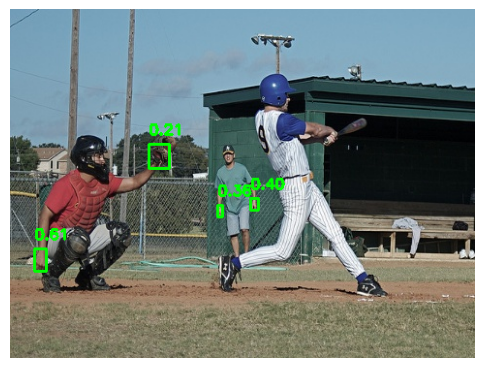


image 1/1 /content/yolov7-hand-detection/data/images/test/000000075624.jpg: 480x640 3 hands, 11.0ms
Speed: 3.2ms preprocess, 11.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


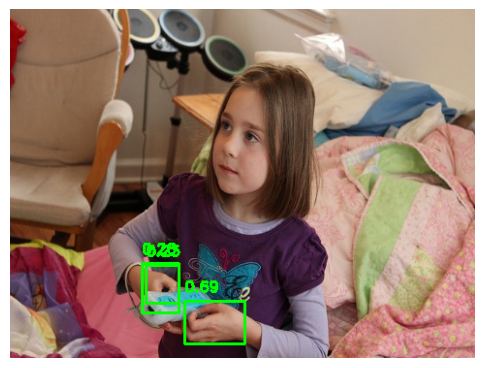


image 1/1 /content/yolov7-hand-detection/data/images/test/000000077195.jpg: 480x640 5 hands, 14.6ms
Speed: 3.8ms preprocess, 14.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


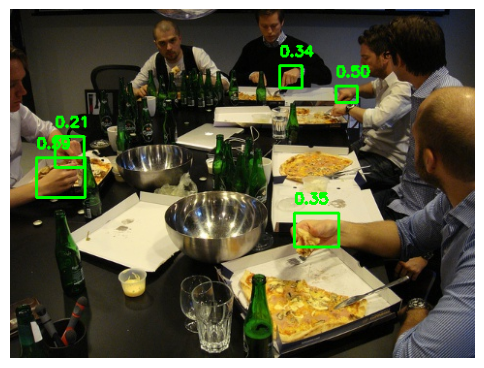


image 1/1 /content/yolov7-hand-detection/data/images/test/000000083466.jpg: 480x640 1 hand, 11.4ms
Speed: 2.9ms preprocess, 11.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


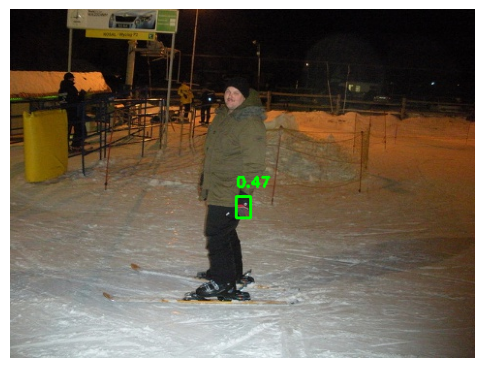


image 1/1 /content/yolov7-hand-detection/data/images/test/000000085826.jpg: 480x640 2 hands, 12.7ms
Speed: 3.0ms preprocess, 12.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


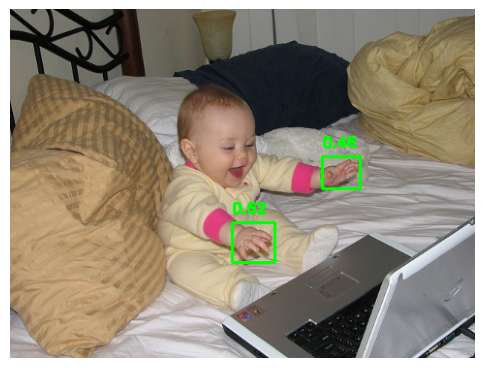


image 1/1 /content/yolov7-hand-detection/data/images/test/000000066129.jpg: 480x640 2 hands, 12.6ms
Speed: 3.1ms preprocess, 12.6ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


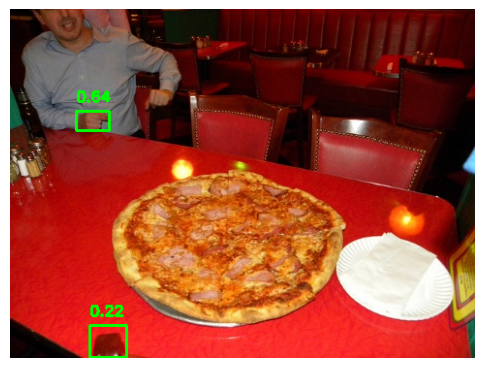


image 1/1 /content/yolov7-hand-detection/data/images/test/000000040643.jpg: 480x640 1 hand, 16.5ms
Speed: 3.1ms preprocess, 16.5ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


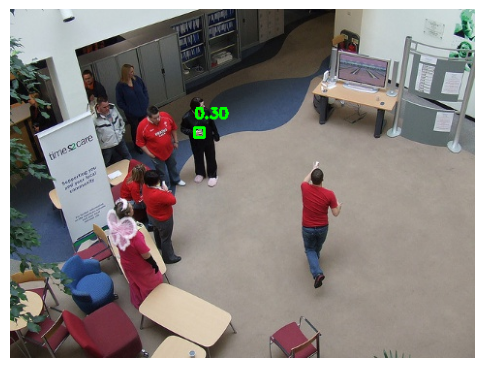


image 1/1 /content/yolov7-hand-detection/data/images/test/000000052123.jpg: 480x640 2 hands, 12.7ms
Speed: 2.9ms preprocess, 12.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


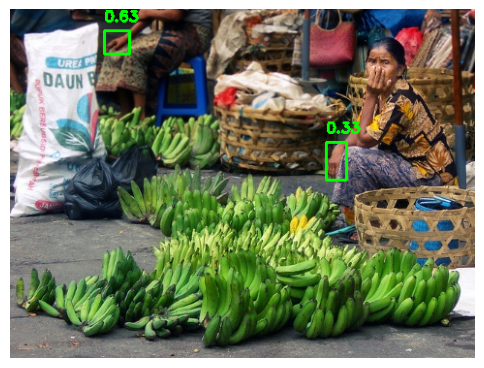


image 1/1 /content/yolov7-hand-detection/data/images/test/000000014807.jpg: 480x640 3 hands, 13.7ms
Speed: 3.0ms preprocess, 13.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


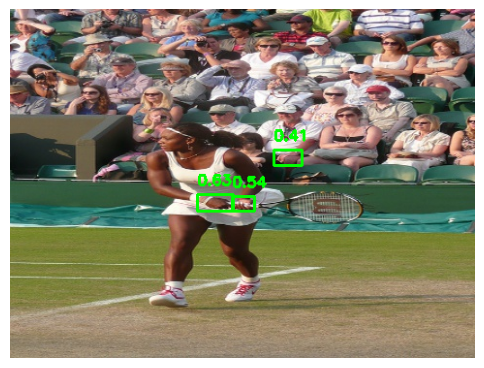


image 1/1 /content/yolov7-hand-detection/data/images/test/000000085434.jpg: 480x640 2 hands, 15.8ms
Speed: 3.1ms preprocess, 15.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


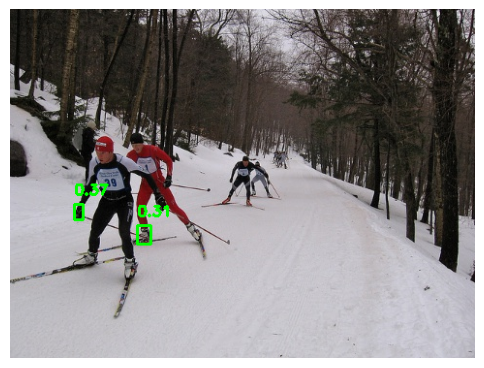

In [16]:
import glob
import cv2
import matplotlib.pyplot as plt
import random

# Load the trained model
model = YOLO("/content/yolov7-hand-detection/runs/detect/train5/weights/best.pt")

# Get all test images
image_paths = glob.glob("/content/yolov7-hand-detection/data/images/test/*.jpg")

# Select 10 random images
random_images = random.sample(image_paths, 10)

# Run inference and display results
for img_path in random_images:
    results = model.predict(img_path, conf=0.2)  # Run inference with confidence threshold 0.25

    # Load image with OpenCV
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

    # Draw bounding boxes
    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
            conf = box.conf[0].item()  # Confidence score

            # Draw rectangle & label
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box
            cv2.putText(img, f"{conf:.2f}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display image
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [19]:
!ls /content/yolov7-hand-detection/runs/detect/train5/
from google.colab import drive
drive.mount('/content/drive')

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1742462707.9126b737d822.6655.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg
Mounted at /content/drive
